# import data

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # charts/plots
%matplotlib inline
import re


# books on my Goodreads shelves
books = pd.read_csv('../input/goodreads-data-778-books/goodreads_library_export.csv')
# Goodreads book database with genres
genres = pd.read_json('../input/books-with-genres/goodreads_book_genres_initial.json', lines = True)
pd.set_option('display.max_columns', None)


In [2]:
books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,16793,Stardust,Neil Gaiman,"Gaiman, Neil",NaN,0061142026,9.780061e+12,0,4.08,Harper Perennial,Paperback,248.0,2006.0,1998.0,NaN,5/26/2021,to-read,to-read (#189),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,6294,"Howl’s Moving Castle (Howl’s Moving Castle, #1)",Diana Wynne Jones,"Jones, Diana Wynne",NaN,006441034X,9.780064e+12,0,4.25,Harper Trophy,Mass Market Paperback,329.0,2001.0,1986.0,NaN,5/26/2021,to-read,to-read (#188),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,49392855,The Two Towers,J.R.R. Tolkien,"Tolkien, J.R.R.",Alan Lee,0008376131,9.780008e+12,0,4.45,HarperCollins,Hardcover,385.0,2020.0,1954.0,NaN,10/8/2020,"owned, currently-reading","owned (#36), currently-reading (#3)",currently-reading,NaN,NaN,NaN,2,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN
3,6568440,Notes from Underground,Fyodor Dostoyevsky,"Dostoyevsky, Fyodor",NaN,NaN,NaN,4,4.15,NaN,Kindle Edition,NaN,NaN,1864.0,5/26/2021,2/18/2021,"owned, reread","owned (#189), reread (#37)",read,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN
4,54419239,Meet Me in Paradise,Libby Hubscher,"Hubscher, Libby",NaN,0593199421,9.780593e+12,0,4.04,Berkley Books,Paperback,352.0,2021.0,2021.0,NaN,5/15/2021,"owned, currently-reading","owned (#119), currently-reading (#2)",currently-reading,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN


In [3]:
genres.head()

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}


# clean genre data

In [4]:
def convert_genres_to_list(genres):
    genres_as_list = []
    for genre_array in genres:
        list_of_chars = ''
        list_of_chars = [c for c in genre_array if c not in "'{}:1234567890"]
        removed_filler_characters = ''
        for c in list_of_chars:
            removed_filler_characters += c
        genres_as_list.append(removed_filler_characters)
    return genres_as_list

genres.genres = genres.genres.apply(convert_genres_to_list)
genres.head()

,book_id,genres
0,5333265,"[history, historical fiction, biography]"
1,1333909,"[fiction, history, historical fiction, biography]"
2,7327624,"[fantasy, paranormal, fiction, mystery, thrill..."
3,6066819,"[fiction, romance, mystery, thriller, crime]"
4,287140,[non-fiction]


# what genres do I read?

In [5]:
books_with_genres = pd.merge(books, genres, left_on = 'Book Id', right_on = 'book_id')
separated_genres = pd.DataFrame(columns = ['book_id', 'genre'])

for index, row in books_with_genres.iterrows():
    for genre in row.genres:
        if row['Read Count'] > 0:
            new_row = { 'book_id' : row.book_id, 'genre' : genre }
            separated_genres = separated_genres.append(new_row, ignore_index = True)

separated_genres

,book_id,genre
0,6568440,fiction
1,6568440,"history, historical fiction, biography"
2,28372019,romance
3,28372019,fiction
4,894459,fiction
...,...,...
1738,15751404,fiction
1739,6452796,non-fiction
1740,2612,non-fiction
1741,2612,"history, historical fiction, biography"


In [6]:
separated_genres = separated_genres.groupby(['genre'], as_index = False).count().sort_values('book_id', ascending = False)
my_genres = separated_genres[(separated_genres['genre'] != 'fiction') & (separated_genres['genre'] != 'young-adult') & (separated_genres['genre'] != 'children')]

<AxesSubplot:ylabel='book_id'>

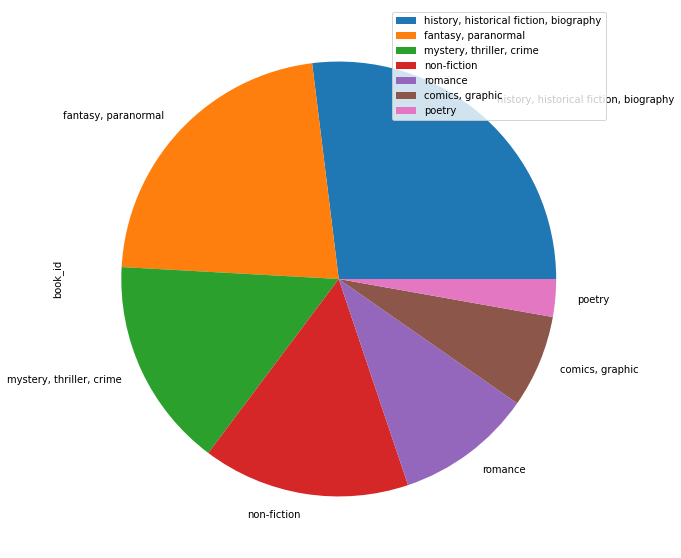

In [7]:
my_genres.plot.pie(y = 'book_id', figsize = (10, 10), labels = my_genres.genre)

# how popular are the books I read?

In [11]:
books = books.sort_values('Average Rating', ascending = False)
books
# put top 10 in a bar chart

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
162,22962342,Fret Busters: God's Peace for Your Problems Today,Roy Lessin,"Lessin, Roy",NaN,0736959076,9.780737e+12,5,5.00,Harvest House Publishers,Hardcover,128.0,2015.0,2015.0,12/17/2020,2/8/2020,owned,owned (#56),read,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN
580,24812,The Complete Calvin and Hobbes,Bill Watterson,"Watterson, Bill",NaN,0740748475,9.780741e+12,5,4.79,Andrews McMeel Publishing,Hardcover,1456.0,2005.0,2005.0,12/25/2019,9/3/2019,favorite,favorite (#10),read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
383,17332218,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,"Sanderson, Brandon",NaN,0765326361,9.780765e+12,0,4.74,Tor Books,Hardcover,1087.0,2014.0,2014.0,NaN,3/3/2021,to-read,to-read (#111),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
677,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,"Watterson, Bill",NaN,0836221362,9.780836e+12,0,4.71,Andrews McMeel Publishing,Paperback,176.0,1996.0,1996.0,NaN,8/23/2019,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
674,70489,There's Treasure Everywhere (Calvin and Hobbes...,Bill Watterson,"Watterson, Bill",NaN,0836213122,9.780836e+12,0,4.69,Andrews McMeel Publishing,Paperback,176.0,1996.0,1996.0,NaN,8/23/2019,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,31868682,Bad Choices,Ali Almossawi,"Almossawi, Ali",NaN,0735222126,9.780735e+12,3,3.26,Viking,Hardcover,160.0,2017.0,2017.0,8/1/2019,7/26/2019,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
240,17412470,A Comprehensive Anthology of American Poetry,Conrad Aiken,"Aiken, Conrad",NaN,NaN,NaN,0,3.17,Modern Library,Hardcover,490.0,1944.0,1944.0,NaN,11/28/2018,dnf,dnf (#26),dnf,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
348,18490619,Friendship,Emily Gould,"Gould, Emily",NaN,0374158614,9.780374e+12,0,3.06,"Farrar, Straus and Giroux",Hardcover,258.0,2014.0,2014.0,NaN,4/6/2021,dnf,dnf (#16),dnf,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
747,21423336,Her,Harriet Lane,"Lane, Harriet",NaN,031636987X,9.780316e+12,4,2.83,"Little, Brown and Company",Hardcover,272.0,2015.0,2014.0,NaN,12/8/2017,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


# what are the worst books I read?

In [9]:
# sort by rating
# put bottom 10 in a bar chart

# sources

data source: https://github.com/MengtingWan/goodreads